## SlamStats Analytics <br>

Vincent Funtanilla - u1282199@utah.edu, u1282199 <br>

Jacob Layton - jake.layton@utah.edu, u1312858 <br>

John Chae- u1285738@utah.edu, u1285738 <br>

## Background and Motivation <br>
 
Our motivation for undertaking this  project stems from a passion and curiosity for the game of basketball. By delving into player performances, strategies, and game outcomes, we hope to provide a valuable resource for basketball enthusiasts and enhance the overall fan experience. We want to contribute positively to the basketball community, offering valuable insights for analysts, coaches, and fans alike. We also see this project as an opportunity for skill development, allowing us to apply and refine our data science skills in a real-world context. Ultimately, our goal is to bring innovation to sports analytics, fostering a deeper appreciation for the game we love.

## Project Objectives <br>

There are three questions we want to answer;<br>
- Who will be the 2024 MVP?<br>
- Who will be the 2024 defensive player of the year?<br>
- Which team will win the 2024 NBA Finals?<br>
    
We want to create a model that can predict not only this years finals and award winners, but also identify what the most important statistics are in prediciting them. This will help us gain a lot of insight into what these statistics mean and give us a better understanding of categorical models. 
    
## Data Description and Acquisition

We will be collecting data from https://www.basketball-reference.com/. Basketball Reference is an online basketball encyclopedia that contains all relevant basketball statistics. Basketball Reference does not allow data scraping but all data is available to download as Excel spreadsheets. To obtain the data we will download the Excel spreadsheet containing the data of interest from Basketball Reference and then we will save the spreadsheet as a CSV file which we can open in Jupyter Notebook. We will collect player and team data from the past 23 seasons to ensure that we have enough information to build our models. For player data we will collect season total data and per game data. Season total data refers to cumulative statistics such as total number of points scored. Per game data refers to average stats per game such as average points scored per game. We will collect four types of team data, offensive, defensive, advanced, and playoff. The offensive and defensive data will tell us about the offensive and defense performance of each team. The advanced team data will tell us how the team performed throughout the season such as their win/loss record. From the playoff data we are intereseted in teams playoff record. 


## Ethical Considerations

One main ethical implication of our analyses is related to gambling. While our project aims to provide valuable insights into basketball dynamics, we acknowledge the potential risk of individuals excessively gambling based on our findings. It is important that we approach our work with a sense of responsibility, emphasizing the importance of using data-driven insights for informed decision-making rather than irresponsible gambling behavior. We can also promote responsible engagement with our analyses and advocate for measures to mitigate the risks associated with problem gambling within the context of sports betting.<br>

It’s also crucial to consider the potential impact of our analyses on fan engagement and player welfare. While we aim to foster constructive dialogue among fans, we should avoid promoting negative behaviors or attitudes that could harm the mental well-being of players. We want to uphold the integrity of the game and the welfare of those involved, including players, teams, and fans.

## Data Cleaning and Processing

The player and team data will be processed and cleaned seperately. As both the player and team data are stored in excel files the data will need to be read in and then combined into one large data frame. Most of the data is already fairly presentable but there are a few minor issues that will need to be resolved. One issue in the player data is that the column titles appear in the first row of the data frame instead of the header column. Another issue in the player data to be resolved are the NaN values which appear in columns with numerical values. For the team data there are multiple overlapping columns from the different data sets, these will need to be removed. Finally some data will need to be added to both data frames as they are processed such as the season that the data pertains.

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn import tree, svm, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

The cell below extracts the names of all excel files containg our player data. The names of the files are then split up by the type of data they store (season totals or averages per game) and are stored in two seperate lists. These two lists of file names will be used below to extract all the data into the Jupyter Notebook.

## Player Data Import

In [2]:
#Get local directory and get csv file names
main_directory = os.path.normpath(os.getcwd())
data_directory = os.path.join(main_directory, 'data')
file_names = [f for f in os.listdir(data_directory) if os.path.isfile(os.path.join(data_directory, f))]
print(file_names)

['00-01 player stats per game.csv', '00-01 player stats.csv', '01-02 player stats per game.csv', '01-02 player stats.csv', '02-03 player stats per game.csv', '02-03 player stats.csv', '03-04 player stats per game.csv', '03-04 player stats.csv', '04-05 player stats per game.csv', '04-05 player stats.csv', '05-06 player stats per game.csv', '05-06 player stats.csv', '06-07 player stats per game.csv', '06-07 player stats.csv', '07-08 player stats per game.csv', '07-08 player stats.csv', '08-09 player stats per game.csv', '08-09 player stats.csv', '09-10 player stats per game.csv', '09-10 player stats.csv', '10-11 player stats per game.csv', '10-11 player stats.csv', '11-12 player stats per game.csv', '11-12 player stats.csv', '12-13 player stats per game.csv', '12-13 player stats.csv', '13-14 player stats per game.csv', '13-14 player stats.csv', '14-15 player stats per game.csv', '14-15 player stats.csv', '15-16 player stats per game.csv', '15-16 player stats.csv', '16-17 player stats per

Lets organize these file names into a list and only get the file we want

In [3]:
#Filtering file names to have list of only wanted csv files
filtered_file_list = [filename for filename in file_names if 'MVP' not in filename and 'Defensive Player of the Year' not in filename]

files = []
for filename in filtered_file_list:
    if 'game.csv' in filename:
        files.append(filename)

print(files)

['00-01 player stats per game.csv', '01-02 player stats per game.csv', '02-03 player stats per game.csv', '03-04 player stats per game.csv', '04-05 player stats per game.csv', '05-06 player stats per game.csv', '06-07 player stats per game.csv', '07-08 player stats per game.csv', '08-09 player stats per game.csv', '09-10 player stats per game.csv', '10-11 player stats per game.csv', '11-12 player stats per game.csv', '12-13 player stats per game.csv', '13-14 player stats per game.csv', '14-15 player stats per game.csv', '15-16 player stats per game.csv', '16-17 player stats per game.csv', '17-18 player stats per game.csv', '18-19 player stats per game.csv', '19-20 player stats per game.csv', '20-21 player stats per game.csv', '21-22 player stats per game.csv', '22-23 player stats per game.csv', '23-24 player stats per game.csv']


Now lets read into one the of the csv file and investigate somethings

In [4]:
#Read into one of the csv file and investigate the data
df_01_02 = pd.read_csv(os.path.join(data_directory,files[0]),header=0)
df_01_02

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Mahmoud Abdul-Rauf,PG,31,VAN,41,0,11.9,2.9,6.0,...,0.1,0.5,0.6,1.9,0.2,0.0,0.6,1.2,6.5,abdulma02
1,2,Tariq Abdul-Wahad,SG,26,DEN,29,12,14.5,1.5,3.8,...,0.5,1.6,2.0,0.8,0.5,0.4,1.2,1.9,3.8,abdulta01
2,3,Shareef Abdur-Rahim,SF,24,VAN,81,81,40.0,7.5,15.8,...,2.2,6.9,9.1,3.1,1.1,1.0,2.9,2.9,20.5,abdursh01
3,4,Cory Alexander,PG,27,ORL,26,0,8.7,0.7,2.2,...,0.0,1.0,1.0,1.4,0.6,0.0,1.0,1.1,2.0,alexaco01
4,5,Courtney Alexander,PG,23,TOT,65,24,21.3,3.7,8.8,...,0.6,1.6,2.2,1.0,0.7,0.1,1.2,2.1,9.5,alexaco02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,437,David Wingate,SG,37,SEA,1,0,9.0,3.0,3.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,6.0,wingada01
533,438,Rubén Wolkowyski,PF,27,SEA,34,1,9.0,0.7,2.3,...,0.4,1.0,1.4,0.1,0.2,0.5,0.4,1.1,2.2,wolkoru01
534,439,Metta World Peace,SF,21,CHI,76,74,31.1,4.3,10.7,...,0.8,3.1,3.9,3.0,2.0,0.6,2.1,3.3,11.9,artesro01
535,440,Lorenzen Wright,C,25,ATL,71,46,28.0,5.1,11.4,...,2.5,5.0,7.5,1.2,0.6,0.9,1.8,3.3,12.4,wrighlo02


In [5]:
#Check for duplicate players, this is due to transfers during seasons
pd.set_option('display.max_rows', None)
player_duplicate = df_01_02['Player'].value_counts()
player_duplicate

Player
Doug Overton             4
Anthony Miller           4
Garth Joseph             3
Rick Brunson             3
Kevin Ollie              3
Juwan Howard             3
Cherokee Parks           3
Kornél Dávid             3
Nazr Mohammed            3
Loy Vaught               3
Corie Blount             3
Eric Montross            3
Roshown McLeod           3
Pepe Sánchez             3
Calvin Booth             3
Paul McPherson           3
Larry Robinson           3
Erick Strickland         3
Mark Strickland          3
Rod Strickland           3
Vinny Del Negro          3
Anthony Johnson          3
Chucky Brown             3
Brevin Knight            3
Jim Jackson              3
Toni Kukoč*              3
Rubén Garcés             3
Tyrone Nesby             3
Sean Colson              3
Courtney Alexander       3
Hubert Davis             3
Mark Jackson             3
Kevin Willis             3
Corliss Williamson       3
Bill Curley              3
Felipe López             3
Othella Harrington   

In [6]:
#Investigate player named Doug Overton
duplicate_data = df_01_02[df_01_02['Player'] == 'Doug Overton']
duplicate_data

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
373,303,Doug Overton,PG,31,TOT,21,10,22.6,2.5,6.6,...,0.2,1.7,1.9,3.4,0.4,0.0,1.5,1.8,6.0,overtdo01
374,303,Doug Overton,PG,31,BOS,7,1,20.6,2.1,6.3,...,0.4,1.7,2.1,2.7,0.6,0.0,1.9,2.1,5.4,overtdo01
375,303,Doug Overton,PG,31,CHH,2,0,7.5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.5,0.0,1.5,1.0,2.0,overtdo01
376,303,Doug Overton,PG,31,NJN,12,9,26.3,2.9,7.8,...,0.1,1.9,2.0,4.4,0.3,0.0,1.3,1.7,6.9,overtdo01


Doug Overton played for three different teams in the 2001-02 season. Boston Celtics, Charlotte Hornets, and Brooklyn Nets and the combined total of his stats is represented as ```TOT``` in the the ```Team``` column. Looks like if there is an instance of player playing for multiple teams ```TOT``` appears very first. We can later on use this information in data cleaning

Now lets get all the MVP player data and defensive data

In [7]:
MVP_df = pd.read_csv(os.path.join(data_directory,'MVP player stats.csv'),header=1)
MVP_df

,Season,Lg,Player,Voting,Age,Tm,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
0,2022-23,NBA,Joel Embiid,(V),28,PHI,66,34.6,33.1,10.2,4.2,1.0,1.7,0.548,0.330,0.857,12.3,0.259,embiijo01
1,2021-22,NBA,Nikola Jokić,(V),26,DEN,74,33.5,27.1,13.8,7.9,1.5,0.9,0.583,0.337,0.810,15.2,0.296,jokicni01
2,2020-21,NBA,Nikola Jokić,(V),25,DEN,72,34.6,26.4,10.8,8.3,1.3,0.7,0.566,0.388,0.868,15.6,0.301,jokicni01
3,2019-20,NBA,Giannis Antetokounmpo,(V),25,MIL,63,30.4,29.5,13.6,5.6,1.0,1.0,0.553,0.304,0.633,11.1,0.279,antetgi01
4,2018-19,NBA,Giannis Antetokounmpo,(V),24,MIL,72,32.8,27.7,12.5,5.9,1.3,1.5,0.578,0.256,0.729,14.4,0.292,antetgi01
5,2017-18,NBA,James Harden,(V),28,HOU,72,35.4,30.4,5.4,8.8,1.8,0.7,0.449,0.367,0.858,15.4,0.289,hardeja01
6,2016-17,NBA,Russell Westbrook,(V),28,OKC,81,34.6,31.6,10.7,10.4,1.6,0.4,0.425,0.343,0.845,13.1,0.224,westbru01
7,2015-16,NBA,Stephen Curry,(V),27,GSW,79,34.2,30.1,5.4,6.7,2.1,0.2,0.504,0.454,0.908,17.9,0.318,curryst01
8,2014-15,NBA,Stephen Curry,(V),26,GSW,80,32.7,23.8,4.3,7.7,2.0,0.2,0.487,0.443,0.914,15.7,0.288,curryst01
9,2013-14,NBA,Kevin Durant,(V),25,OKC,81,38.5,32.0,7.4,5.5,1.3,0.7,0.503,0.391,0.873,19.2,0.295,duranke01


Lets grab each player name and their MVP winning season and store them into an dictionary

In [8]:
#Grabbing MVP award winner for each season
season_mvp_dict = {}
for index,row in MVP_df.iterrows():
    season = row['Season']
    player = row['Player']
    season_short = season[2:]
    season_mvp_dict[season_short] = player

print(season_mvp_dict)

{'22-23': 'Joel Embiid', '21-22': 'Nikola Jokić', '20-21': 'Nikola Jokić', '19-20': 'Giannis Antetokounmpo', '18-19': 'Giannis Antetokounmpo', '17-18': 'James Harden', '16-17': 'Russell Westbrook', '15-16': 'Stephen Curry', '14-15': 'Stephen Curry', '13-14': 'Kevin Durant', '12-13': 'LeBron James', '11-12': 'LeBron James', '10-11': 'Derrick Rose', '09-10': 'LeBron James', '08-09': 'LeBron James', '07-08': 'Kobe Bryant', '06-07': 'Dirk Nowitzki', '05-06': 'Steve Nash', '04-05': 'Steve Nash', '03-04': 'Kevin Garnett', '02-03': 'Tim Duncan', '01-02': 'Tim Duncan', '00-01': 'Allen Iverson', '99-00': "Shaquille O'Neal", '98-99': 'Karl Malone', '97-98': 'Michael Jordan', '96-97': 'Karl Malone', '95-96': 'Michael Jordan', '94-95': 'David Robinson', '93-94': 'Hakeem Olajuwon', '92-93': 'Charles Barkley', '91-92': 'Michael Jordan', '90-91': 'Michael Jordan', '89-90': 'Magic Johnson', '88-89': 'Magic Johnson', '87-88': 'Michael Jordan', '86-87': 'Magic Johnson', '85-86': 'Larry Bird', '84-85': '

In [9]:
#Doing the same thing we did with the MVP to Denfesive Player of the Year
defensive_df = pd.read_csv(os.path.join(data_directory,'Defensive Player of the Year player stats.csv'),header=1)
season_defensive_dict = {}
for index,row in defensive_df.iterrows():
    season = row['Season']
    player = row['Player']
    season_short = season[2:]
    season_defensive_dict[season_short] = player

Now lets loop through all the season data we have and combine them while making a new column named ```MVP``` and ```Defensive player of the Year```. We will assign zeros and ones, one denoting the player won the MVP award or Defensive Player of the Year award.

In [10]:
#Read all the csv file and clean it up alittle before concatnating into one big dataframe
combine_clean_df = pd.DataFrame()
for csv_file in files:
    #Read in the csv
    df = pd.read_csv(os.path.join(data_directory,csv_file),header=0)
    #Some cleaning for Player column
    df['Player'] = df['Player'].str.replace('*','')
    #Drop unnecessary column
    df = df.drop(columns = ['Rk','Player-additional'])
    #Grab the season string to later on use it to assign MVP or Defensive Player of the Year winners
    season = (csv_file[0:2] + csv_file[3:5])
    #Add the year to the data frame
    df['Year'] = season
    #Using the agg function, We grab the first rows of each unique players which have their Total stats from
    #multiple team if any
    combined_df = df.groupby('Player').agg({
    'Age': 'first',
    'Pos':'first',
    'Tm':'first',
    'G':'first',
    'GS':'first',
    'MP':'first',
    'FG':'first',
    'FGA':'first',
    'FG%':'first',
    '3P':'first',
    '3PA':'first',
    '3P%' : 'first',
    '2P':'first',
    '2PA':'first',
    '2P%':'first',
    'FT':'first',
    'FTA':'first',
    'FT%':'first',
    'eFG%':'first',
    'ORB':'first',
    'DRB':'first',
    'TRB':'first',
    'AST':'first',
    'STL':'first',
    'BLK':'first',
    'TOV':'first',
    'PF':'first',
    'PTS':'first',
    'Year':'first'
    }).reset_index()
    
    '''combined_df['FG%'] = combined_df['FG'] / combined_df['FGA']
    combined_df['3P%'] = combined_df['3P'] / combined_df['3PA']
    combined_df['2P%'] = combined_df['2P'] / combined_df['2PA']
    combined_df['FT%'] = combined_df['FT'] / combined_df['FTA']
    combined_df['eFG%'] = (combined_df['FG'] + 0.5 * combined_df['3P'])/ combined_df['FGA']'''
    
    season = csv_file[:5]
    
    #Creating a column of MVP and Defensive Player of the year, zeros and ones
    if season in season_mvp_dict:
        mvp_player = season_mvp_dict[season]
        combined_df['MVP'] = (combined_df['Player'] == mvp_player).astype(int)
    if season in season_defensive_dict:
        defensive_player = season_defensive_dict[season]
        combined_df['Defensive Player of the Year'] = (combined_df['Player'] == defensive_player).astype(int)
    combine_clean_df = pd.concat([combine_clean_df,combined_df])

#Lets check if we assigned everything correclty. There should be only 23 MVP and Defensive winners
mvp_count = (combine_clean_df['MVP'] == 1).sum()
denfensive_count = (combine_clean_df['Defensive Player of the Year'] == 1).sum()

print('The count for MVP award winners are : ', mvp_count)
print('\nThe count for Defensive Player of the Year award winners are : ',denfensive_count)

The count for MVP award winners are :  23

The count for Defensive Player of the Year award winners are :  23


In [11]:
#Lets look at the combine data set we created
pd.set_option('display.max_columns', None)
combine_clean_df.head(10)

,Player,Age,Pos,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,eFG%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,MVP,Defensive Player of the Year
0,A.C. Green,37,PF,MIA,82,1,17.2,1.8,4.0,0.444,0.0,0.1,0.000,1.8,3.9,0.453,1.0,1.4,0.712,0.444,1.3,2.5,3.8,0.5,0.4,0.1,0.5,1.5,4.5,0001,0.0,0.0
1,A.J. Guyton,22,PG,CHI,33,8,19.1,2.4,5.8,0.406,0.8,2.1,0.391,1.5,3.7,0.415,0.5,0.5,0.833,0.477,0.3,0.8,1.1,1.9,0.3,0.2,0.7,1.1,6.0,0001,0.0,0.0
2,Aaron McKie,28,SG,PHI,76,33,31.5,4.4,9.4,0.473,0.7,2.2,0.312,3.8,7.2,0.524,2.0,2.6,0.768,0.511,0.4,3.7,4.1,5.0,1.4,0.1,2.7,2.3,11.6,0001,0.0,0.0
3,Aaron Williams,29,PF,NJN,82,25,28.5,3.6,7.9,0.457,0.0,0.0,0.000,3.6,7.9,0.458,3.0,3.8,0.787,0.457,2.6,4.6,7.2,1.1,0.7,1.4,1.6,3.9,10.2,0001,0.0,0.0
4,Adam Keefe,30,PF,GSW,67,13,12.5,1.0,2.4,0.403,0.0,0.0,0.333,0.9,2.3,0.404,0.6,0.9,0.619,0.406,1.3,1.8,3.1,0.5,0.4,0.3,0.6,1.5,2.5,0001,0.0,0.0
5,Adonal Foyle,25,C,GSW,58,37,25.1,2.7,6.5,0.416,0.0,0.0,NaN,2.7,6.5,0.416,0.5,1.2,0.441,0.416,2.7,4.3,7.0,0.8,0.5,2.7,1.4,2.3,5.9,0001,0.0,0.0
6,Adrian Griffin,26,SF,BOS,44,0,8.6,0.8,2.2,0.340,0.2,0.6,0.346,0.5,1.6,0.338,0.4,0.5,0.750,0.387,0.6,1.4,2.0,0.6,0.4,0.1,0.4,1.0,2.1,0001,0.0,0.0
7,Al Harrington,20,PF,IND,78,38,24.3,3.1,7.0,0.444,0.0,0.1,0.143,3.1,6.9,0.448,1.3,2.0,0.656,0.445,1.5,3.4,4.9,1.7,0.8,0.2,1.9,2.9,7.5,0001,0.0,0.0
8,Alan Henderson,28,PF,ATL,73,42,24.8,4.1,9.2,0.444,0.0,0.0,0.000,4.1,9.2,0.445,2.4,3.7,0.638,0.444,2.5,3.1,5.6,0.7,0.7,0.4,1.7,2.2,10.5,0001,0.0,0.0
9,Allan Houston,29,SG,NYK,78,78,36.6,6.9,15.5,0.449,1.2,3.2,0.381,5.7,12.3,0.467,3.6,3.9,0.909,0.488,0.3,3.4,3.6,2.2,0.7,0.1,2.1,2.4,18.7,0001,0.0,0.0


In [12]:
combine_clean_df.tail(10)

,Player,Age,Pos,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,eFG%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,MVP,Defensive Player of the Year
562,Wesley Matthews,37,SG,ATL,36,3,11.5,0.9,2.7,0.351,0.7,1.9,0.348,0.3,0.8,0.357,0.5,0.7,0.750,0.474,0.3,1.2,1.5,0.6,0.4,0.3,0.2,1.2,3.1,2324,NaN,NaN
563,Xavier Moon,29,SG,LAC,14,1,8.5,1.1,3.3,0.326,0.1,1.2,0.118,0.9,2.1,0.448,0.1,0.1,0.500,0.348,0.6,0.7,1.3,1.5,0.2,0.2,0.4,0.6,2.4,2324,NaN,NaN
564,Xavier Tillman Sr.,25,C-PF,TOT,54,15,18.0,2.2,5.2,0.434,0.4,1.5,0.247,1.9,3.7,0.510,0.4,0.9,0.440,0.470,1.3,2.6,3.9,1.4,0.9,0.8,0.6,1.4,5.3,2324,NaN,NaN
565,Yuta Watanabe,29,SF,TOT,34,0,13.6,1.2,3.4,0.353,0.7,2.5,0.294,0.5,0.9,0.516,0.3,0.5,0.588,0.461,0.3,1.3,1.6,0.4,0.4,0.2,0.6,1.1,3.4,2324,NaN,NaN
566,Zach Collins,26,C,SAS,69,29,22.1,4.3,8.9,0.484,0.8,2.6,0.320,3.5,6.3,0.552,1.8,2.3,0.753,0.531,1.7,3.7,5.4,2.8,0.5,0.8,1.9,3.0,11.2,2324,NaN,NaN
567,Zach LaVine,28,SG,CHI,25,23,34.9,6.8,15.0,0.452,2.4,6.8,0.349,4.4,8.3,0.536,3.5,4.1,0.854,0.531,0.3,4.8,5.2,3.9,0.8,0.3,2.1,2.3,19.5,2324,NaN,NaN
568,Zavier Simpson,26,PG,MEM,7,0,23.0,2.4,7.7,0.315,0.7,2.4,0.294,1.7,5.3,0.324,0.4,0.6,0.750,0.361,0.6,2.3,2.9,3.6,1.0,0.4,1.4,1.6,6.0,2324,NaN,NaN
569,Zeke Nnaji,23,PF,DEN,58,0,9.9,1.2,2.6,0.463,0.1,0.4,0.261,1.1,2.2,0.500,0.7,1.1,0.677,0.483,1.1,1.1,2.2,0.6,0.3,0.7,0.5,1.4,3.2,2324,NaN,NaN
570,Ziaire Williams,22,SF,MEM,51,15,20.4,2.9,7.4,0.397,1.1,3.7,0.307,1.8,3.7,0.487,1.2,1.5,0.827,0.474,0.7,2.8,3.5,1.5,0.7,0.2,1.3,1.7,8.2,2324,NaN,NaN
571,Zion Williamson,23,PF,NOP,70,70,31.5,8.9,15.6,0.570,0.1,0.3,0.333,8.8,15.4,0.574,5.0,7.1,0.702,0.573,1.7,4.1,5.8,5.0,1.1,0.7,2.8,2.3,22.9,2324,NaN,NaN


23 MVP's and 23 Defensive player of the Year, which is correct since we are only looking at season from 01 to 23.
Lets save this into an csv.

## Player Data Cleaning

Lets determine if there are NaN values in our data frames.

In [13]:
#Checking for NaN
combine_clean_df.isnull().sum()

Player                             0
Age                                0
Pos                                0
Tm                                 0
G                                  0
GS                                 0
MP                                 0
FG                                 0
FGA                                0
FG%                               48
3P                                 0
3PA                                0
3P%                             1430
2P                                 0
2PA                                0
2P%                               90
FT                                 0
FTA                                0
FT%                              463
eFG%                              48
ORB                                0
DRB                                0
TRB                                0
AST                                0
STL                                0
BLK                                0
TOV                                0
P

There are some null values lets look into that.

In [14]:
combine_clean_df.shape

(11655, 32)

In [15]:
data = combine_clean_df[combine_clean_df['FG%'].isna()]
data

,Player,Age,Pos,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,eFG%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,MVP,Defensive Player of the Year
15,Andy Panko,23,SF,ATL,1,0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0001,0.0,0.0
254,Lari Ketner,23,PF,IND,3,0,2.3,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.3,0.0,0.0,0.7,0.0,0.0,0001,0.0,0.0
120,Dickey Simpkins,29,PF,ATL,1,0,3.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0102,0.0,0.0
162,Guy Rucker,25,PF,GSW,3,0,1.3,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.3,0.3,0.3,0.0,0.0,0.0,0.3,0.0,0203,0.0,0.0
196,Jelani McCoy,26,C,CLE,2,0,6.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.5,1.5,2.0,0.0,0.0,0.0,0.5,2.0,0.0,0304,0.0,0.0
310,Olden Polynice,39,C,LAC,2,0,6.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.5,0.5,1.0,0.5,0.5,0.0,2.0,1.0,0.0,0304,0.0,0.0
346,Pavel Podkolzin,20,C,DAL,5,0,2.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.2,0.4,0.5,NaN,0.0,0.4,0.4,0.0,0.0,0.0,0.4,0.8,0.2,0405,0.0,0.0
10,Alex Scales,27,SG,SAS,1,0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0506,0.0,0.0
68,Bryon Russell,35,SF,DEN,1,0,3.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0506,0.0,0.0
120,Deng Gai,23,C,PHI,2,0,2.5,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0506,0.0,0.0


Looks like its NaN because it is dividing by zero, lets replace them with zeros.

In [16]:
#Checking for NaNs
combine_clean_df.fillna(0, inplace=True)
combine_clean_df.isnull().sum()

Player                          0
Age                             0
Pos                             0
Tm                              0
G                               0
GS                              0
MP                              0
FG                              0
FGA                             0
FG%                             0
3P                              0
3PA                             0
3P%                             0
2P                              0
2PA                             0
2P%                             0
FT                              0
FTA                             0
FT%                             0
eFG%                            0
ORB                             0
DRB                             0
TRB                             0
AST                             0
STL                             0
BLK                             0
TOV                             0
PF                              0
PTS                             0
Year          

In [17]:
#Lets give the column header more indepth name 
name_map = {'Rk':'Rank','Pos':'Position','Tm':'Team','G':'Games','GS':'Games started','MP':'Minutes played per game'
             ,'FG':'Field goals per game','FGA':'Field goals attempt per game','FG%':'Field goal percentage','3P':'3 point field goal per game',
             '3PA':'3 point field goal attempt per game', '3P%':'3 point field goal percentage','2P':'2 point field goal per game', '2PA':'2 point field goal attempt per game',
             '2P%':'2 point field goal percentage', 'eFG%':'Effective field goal percentage', 'FT':'Free throws per game',
             'FTA':'Free throw attempt per game','FT%':'Free throw percentage','ORB':'Offensive rebounds per game','DRB':'Defensive rebounds per game',
             'TRB':'Total rebounds per game','AST':'Assists per game','STL':'Steals per game','BLK':'Blocks per game','TOV':'Turn overs per game',
             'PF':'Personal fouls per game','PTS':'Points per game'}

renamed_df = combine_clean_df.rename(columns=name_map)
renamed_df.head(10)

,Player,Age,Position,Team,Games,Games started,Minutes played per game,Field goals per game,Field goals attempt per game,Field goal percentage,3 point field goal per game,3 point field goal attempt per game,3 point field goal percentage,2 point field goal per game,2 point field goal attempt per game,2 point field goal percentage,Free throws per game,Free throw attempt per game,Free throw percentage,Effective field goal percentage,Offensive rebounds per game,Defensive rebounds per game,Total rebounds per game,Assists per game,Steals per game,Blocks per game,Turn overs per game,Personal fouls per game,Points per game,Year,MVP,Defensive Player of the Year
0,A.C. Green,37,PF,MIA,82,1,17.2,1.8,4.0,0.444,0.0,0.1,0.000,1.8,3.9,0.453,1.0,1.4,0.712,0.444,1.3,2.5,3.8,0.5,0.4,0.1,0.5,1.5,4.5,0001,0.0,0.0
1,A.J. Guyton,22,PG,CHI,33,8,19.1,2.4,5.8,0.406,0.8,2.1,0.391,1.5,3.7,0.415,0.5,0.5,0.833,0.477,0.3,0.8,1.1,1.9,0.3,0.2,0.7,1.1,6.0,0001,0.0,0.0
2,Aaron McKie,28,SG,PHI,76,33,31.5,4.4,9.4,0.473,0.7,2.2,0.312,3.8,7.2,0.524,2.0,2.6,0.768,0.511,0.4,3.7,4.1,5.0,1.4,0.1,2.7,2.3,11.6,0001,0.0,0.0
3,Aaron Williams,29,PF,NJN,82,25,28.5,3.6,7.9,0.457,0.0,0.0,0.000,3.6,7.9,0.458,3.0,3.8,0.787,0.457,2.6,4.6,7.2,1.1,0.7,1.4,1.6,3.9,10.2,0001,0.0,0.0
4,Adam Keefe,30,PF,GSW,67,13,12.5,1.0,2.4,0.403,0.0,0.0,0.333,0.9,2.3,0.404,0.6,0.9,0.619,0.406,1.3,1.8,3.1,0.5,0.4,0.3,0.6,1.5,2.5,0001,0.0,0.0
5,Adonal Foyle,25,C,GSW,58,37,25.1,2.7,6.5,0.416,0.0,0.0,0.000,2.7,6.5,0.416,0.5,1.2,0.441,0.416,2.7,4.3,7.0,0.8,0.5,2.7,1.4,2.3,5.9,0001,0.0,0.0
6,Adrian Griffin,26,SF,BOS,44,0,8.6,0.8,2.2,0.340,0.2,0.6,0.346,0.5,1.6,0.338,0.4,0.5,0.750,0.387,0.6,1.4,2.0,0.6,0.4,0.1,0.4,1.0,2.1,0001,0.0,0.0
7,Al Harrington,20,PF,IND,78,38,24.3,3.1,7.0,0.444,0.0,0.1,0.143,3.1,6.9,0.448,1.3,2.0,0.656,0.445,1.5,3.4,4.9,1.7,0.8,0.2,1.9,2.9,7.5,0001,0.0,0.0
8,Alan Henderson,28,PF,ATL,73,42,24.8,4.1,9.2,0.444,0.0,0.0,0.000,4.1,9.2,0.445,2.4,3.7,0.638,0.444,2.5,3.1,5.6,0.7,0.7,0.4,1.7,2.2,10.5,0001,0.0,0.0
9,Allan Houston,29,SG,NYK,78,78,36.6,6.9,15.5,0.449,1.2,3.2,0.381,5.7,12.3,0.467,3.6,3.9,0.909,0.488,0.3,3.4,3.6,2.2,0.7,0.1,2.1,2.4,18.7,0001,0.0,0.0


In [18]:
#Rechecking MVP count and defensive count
mvp_count = (renamed_df['MVP'] == 1).sum()
mvp_count

23

In [19]:
defensve_counnt = (renamed_df['Defensive Player of the Year'] == 1).sum()
defensve_counnt

23

In [20]:
#Save them into csv
renamed_df.to_csv('cleaned_combine_player_stat_w_MVP_defensive_player.csv',header=True,index=False)

## Team Data Import and Cleaning

In [21]:
team_data_directory = os.path.join(main_directory, 'team_data')
file_names = [f for f in os.listdir(team_data_directory) if os.path.isfile(os.path.join(team_data_directory, f))]
print(file_names)

['.DS_Store', '2000Adv.csv', '2000Def.csv', '2000Off.csv', '2000Playoffs.csv', '2001Adv.csv', '2001Def.csv', '2001Off.csv', '2001Playoffs.csv', '2002Adv.csv', '2002Def.csv', '2002Off.csv', '2002Playoffs.csv', '2003Adv.csv', '2003Def.csv', '2003Off.csv', '2003Playoffs.csv', '2004Adv.csv', '2004Def.csv', '2004Off.csv', '2004Playoffs.csv', '2005Adv.csv', '2005Def.csv', '2005Off.csv', '2005Playoffs.csv', '2006Adv.csv', '2006Def.csv', '2006Off.csv', '2006Playoffs.csv', '2007Adv.csv', '2007Def.csv', '2007Off.csv', '2007Playoffs.csv', '2008Adv.csv', '2008Def.csv', '2008Off.csv', '2008Playoffs.csv', '2009Adv.csv', '2009Def.csv', '2009Off.csv', '2009Playoffs.csv', '2010Adv.csv', '2010Def.csv', '2010Off.csv', '2010Playoffs.csv', '2011Adv.csv', '2011Def.csv', '2011Off.csv', '2011Playoffs.csv', '2012Adv.csv', '2012Def.csv', '2012Off.csv', '2012Playoffs.csv', '2013Adv.csv', '2013Def.csv', '2013Off.csv', '2013Playoffs.csv', '2014Adv.csv', '2014Def.csv', '2014Off.csv', '2014Playoffs.csv', '2015Adv.cs

In [22]:
off_files = [file for file in file_names if 'Off.csv' in file]
def_files = [file for file in file_names if 'Def.csv' in file]
adv_files = [file for file in file_names if 'Adv.csv' in file]
playoff_files = [file for file in file_names if 'Playoffs.csv' in file]

off_files = sorted(off_files)
def_files = sorted(def_files)
adv_files = sorted(adv_files)
playoff_files = sorted(playoff_files)
print(adv_files)


['2000Adv.csv', '2001Adv.csv', '2002Adv.csv', '2003Adv.csv', '2004Adv.csv', '2005Adv.csv', '2006Adv.csv', '2007Adv.csv', '2008Adv.csv', '2009Adv.csv', '2010Adv.csv', '2011Adv.csv', '2012Adv.csv', '2013Adv.csv', '2014Adv.csv', '2015Adv.csv', '2016Adv.csv', '2017Adv.csv', '2018Adv.csv', '2019Adv.csv', '2020Adv.csv', '2021Adv.csv', '2022Adv.csv', '2023Adv.csv', '2024Adv.csv']


This block of code is a big for loop to individually clean each season data set and create an array of them. One data frame is the raw stats, while the other is normalized to the season's league average. See comments for details.

In [23]:
#Dictionary to store DataFrames
team_stats_dfs = {}
normalized_team_dfs = {}

for i in range(25):

    #Read and Cleanup defensive stats
    def_stats = pd.read_csv(os.path.join(team_data_directory,def_files[i]))
    def_stats = def_stats.drop(columns=['Rk','Team▲','G','MP'])
    def_stats = def_stats.add_prefix('Opp ')
   
    #Read and Cleanup advanced stats
    adv_stats = pd.read_csv(os.path.join(team_data_directory,adv_files[i]),header=1)
    adv_stats = adv_stats.drop(columns=['Rk','Team▲','Unnamed: 17','Unnamed: 22','Unnamed: 27','Arena','Attend.','Attend./G'])
    adv_stats = adv_stats.rename(columns={'eFG%.1': 'Opp eFG%', 'TOV%.1': 'Opp TOV%', 'FT/FGA.1': 'Opp FT/FGA'})
    
    #Read and Cleanup main team stats (offensive)
    off_stats = pd.read_csv(os.path.join(team_data_directory,off_files[i]))
    off_stats = off_stats.drop(columns=['Rk','G','MP'])
    off_stats['Team▲'] = off_stats['Team▲'].str.replace('*', '')
    off_stats = off_stats.rename(columns={'Team▲': 'Team'}) 
    #The supersonics was spelled different for some years
    off_stats['Team'] = off_stats['Team'].replace('Seattle SuperSonics', 'Seattle Supersonics')
    #In 2014 Charlotte switched mascots midseason
    if i == 14:
        off_stats['Team'] = off_stats['Team'].replace('Charlotte Bobcats', 'Charlotte Hornets')
    
    #Make one big df of every stat
    team_stats = pd.concat([off_stats, def_stats, adv_stats], axis=1)

    #Add the year to the name
    year = 2000 + i
    team_stats['Team'] = team_stats['Team'] + ' ' + str(year)

    #Replace win and loss columns with winning percentage (2020 and 2021 had shortened seasons)
    winrate = team_stats['W']/(team_stats['W'] + team_stats['L']) 
    pwinrate = team_stats['PW']/(team_stats['PW'] + team_stats['PL'])
    team_stats.insert(44, 'W%', winrate)
    team_stats.insert(47, 'PW%', pwinrate)
    team_stats = team_stats.drop(columns=['W','L','PW','PL'])

    ##################################################
    #Create copy to normalize by year
    normalized_team = team_stats.copy()

    #Get column of team names
    team_col = normalized_team['Team'].copy()
    #Drop team name column (can't divide with strings)
    normalized_team = normalized_team.drop(normalized_team.columns[0], axis=1)

    #Row index for the league average row
    avg_i = len(normalized_team) - 1
        
    #These stats are already normalized and don't appear in the league average row
    normalized_team.at[avg_i,'NRtg'] = 1
    normalized_team.at[avg_i,'MOV'] = 1
    normalized_team.at[avg_i,'SOS'] = 1
    normalized_team.at[avg_i,'SRS'] = 1
    normalized_team.at[avg_i,'W%'] = 1

    #Get the row of averages
    divisor_row = normalized_team.iloc[avg_i]
    
    #Divide every row by the average to normalize
    normalized_team = normalized_team.div(divisor_row, axis=1)
    
    #Add the team column back
    normalized_team.insert(0, 'Team', team_col)
    
    #Drop the league average row in both dataframes
    normalized_team.drop(normalized_team.tail(1).index, inplace=True)
    team_stats.drop(team_stats.tail(1).index, inplace=True)
        
    ##################################################

    #Put this years stats into it's own file
    if i == 24:
        team_stats2024 = team_stats.copy()
        normal_stats2024 = normalized_team.copy()

    else:
    
        #Read in playoff stats
        playoff = pd.read_csv(os.path.join(team_data_directory,playoff_files[i]),header=1)
        #This csv is only used to get the number of playoff wins
        playoff = playoff[['Team', 'W', 'L']]
        playoff.drop(playoff.tail(1).index, inplace=True)
        year = 2000 + i
        playoff['Team'] = playoff['Team'] + ' ' + str(year)

        #New DataFrame for just team names of all the teams
        all_team_names = team_stats['Team']
        all_team_names_df = pd.DataFrame(all_team_names, columns=['Team'])

        #Add the teams that missed the playoffs
        all_teams = pd.concat([playoff, all_team_names_df]).drop_duplicates(subset=['Team'])
        #Replace NaN with -1 to indicate that these teams missed the playoffs
        all_teams = all_teams.fillna(-1)

        #Sort by team alphabetically
        all_teams.sort_values(by='Team', inplace=True)
        #Reset index
        all_teams.reset_index(drop=True, inplace=True)

        #Drop team name and losses
        playoff_wins = all_teams.drop(columns=['Team','L'])

        #Add playoff win column to main df and normal df
        team_stats = pd.concat([team_stats, playoff_wins], axis=1)
        normalized_team = pd.concat([normalized_team, playoff_wins], axis=1)       

        #Create big array of all years (200i)
        team_stats_dfs[i] = team_stats.copy()
        normalized_team_dfs[i] = normalized_team.copy()

display(team_stats_dfs[23])
display(normalized_team_dfs[23])

,Team,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Opp FG,Opp FGA,Opp FG%,Opp 3P,Opp 3PA,Opp 3P%,Opp 2P,Opp 2PA,Opp 2P%,Opp FT,Opp FTA,Opp FT%,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS,Age,W%,PW%,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,Opp eFG%,Opp TOV%,DRB%,Opp FT/FGA,W
0,Atlanta Hawks 2023,44.6,92.4,0.483,10.8,30.5,0.352,33.9,61.8,0.548,18.5,22.6,0.818,11.2,33.2,44.4,25.0,7.1,4.9,12.9,18.8,118.4,43.8,90.2,0.486,11.9,33.5,0.356,31.9,56.7,0.562,18.6,23.2,0.803,10.6,33.5,44.1,26.0,7.5,5.0,14.2,19.7,118.1,24.9,0.500000,0.512195,0.29,0.02,0.32,116.6,116.3,0.3,100.7,0.244,0.331,0.579,0.541,11.2,25.1,0.200,0.552,12.4,75.8,0.206,2.0
1,Boston Celtics 2023,42.2,88.8,0.475,16.0,42.6,0.377,26.2,46.2,0.567,17.5,21.6,0.812,9.7,35.6,45.3,26.7,6.4,5.2,13.4,18.8,117.9,41.8,90.2,0.463,11.6,33.7,0.345,30.1,56.5,0.534,16.2,21.1,0.769,9.7,34.3,44.0,23.1,6.6,3.9,12.7,19.1,111.4,27.4,0.695122,0.695122,6.52,-0.15,6.38,118.0,111.5,6.5,98.5,0.243,0.480,0.600,0.566,12.0,22.1,0.197,0.528,11.3,78.5,0.180,11.0
2,Brooklyn Nets 2023,41.5,85.1,0.487,12.8,33.8,0.378,28.7,51.3,0.559,17.7,22.1,0.800,8.2,32.3,40.5,25.5,7.1,6.2,13.7,21.1,113.4,41.0,88.5,0.463,11.8,32.2,0.367,29.2,56.3,0.518,18.7,24.4,0.767,11.5,33.6,45.1,23.4,7.0,3.9,13.7,18.5,112.5,28.0,0.548780,0.524390,0.85,0.18,1.03,115.0,114.1,0.9,98.3,0.260,0.397,0.598,0.562,12.7,19.6,0.208,0.530,12.2,73.7,0.212,0.0
3,Charlotte Hornets 2023,41.3,90.4,0.457,10.7,32.5,0.330,30.5,57.9,0.528,17.6,23.6,0.749,11.0,33.5,44.5,25.1,7.7,5.2,14.2,20.3,111.0,43.0,90.1,0.477,12.2,34.3,0.357,30.7,55.8,0.550,19.0,24.0,0.795,10.9,35.3,46.2,25.9,7.0,5.7,14.4,20.3,117.2,25.3,0.329268,0.317073,-6.24,0.35,-5.89,109.2,115.3,-6.1,100.8,0.261,0.360,0.550,0.516,12.3,23.8,0.195,0.544,12.5,75.5,0.211,-1.0
4,Chicago Bulls 2023,42.5,86.8,0.490,10.4,28.9,0.361,32.1,57.9,0.555,17.6,21.8,0.809,8.5,33.9,42.4,24.5,7.9,4.5,13.4,18.9,113.1,40.7,87.1,0.468,13.2,37.1,0.357,27.5,50.0,0.550,17.1,22.0,0.779,9.6,33.7,43.3,26.0,6.7,4.7,15.0,18.7,111.8,27.5,0.487805,0.536585,1.29,0.07,1.37,113.5,112.2,1.3,98.5,0.251,0.333,0.587,0.550,12.2,20.1,0.203,0.544,13.5,77.8,0.197,0.0
5,Cleveland Cavaliers 2023,41.6,85.2,0.488,11.6,31.6,0.367,30.0,53.6,0.559,17.5,22.5,0.780,9.7,31.4,41.1,24.9,7.1,4.7,13.3,19.0,112.3,39.0,83.5,0.468,11.3,30.6,0.368,27.8,52.9,0.525,17.5,22.4,0.782,9.8,31.5,41.2,23.0,7.0,4.4,15.7,20.4,106.9,25.4,0.621951,0.670732,5.38,-0.15,5.23,116.1,110.6,5.5,95.7,0.264,0.371,0.590,0.556,12.3,23.6,0.206,0.535,14.4,76.3,0.210,1.0
6,Dallas Mavericks 2023,40.0,84.3,0.475,15.2,41.0,0.371,24.8,43.3,0.574,19.0,25.1,0.755,7.6,31.2,38.8,22.9,6.3,3.7,12.2,20.7,114.2,41.8,86.2,0.485,11.1,31.7,0.352,30.6,54.5,0.562,19.5,25.0,0.781,10.1,34.6,44.7,24.9,6.4,3.8,13.1,21.8,114.1,27.8,0.463415,0.500000,0.07,-0.22,-0.14,116.8,116.7,0.1,96.6,0.298,0.487,0.599,0.565,11.4,18.0,0.225,0.549,11.9,75.5,0.226,-1.0
7,Denver Nuggets 2023,43.6,86.4,0.504,11.8,31.2,0.379,31.8,55.2,0.575,16.8,22.4,0.751,10.1,32.9,43.0,28.9,7.5,4.5,14.5,18.6,115.8,41.7,87.4,0.478,11.4,33.1,0.344,30.4,54.3,0.559,17.6,22.7,0.775,10.1,30.7,40.8,25.7,7.9,4.2,13.5,19.5,112.5,26.6,0.646341,0.597561,3.33,-0.29,3.04,117.6,114.2,3.4,98.1,0.259,0.361,0.601,0.573,13.1,24.8,0.194,0.543,12.2,76.4,0.201,16.0
8,Detroit Pistons 2023,39.6,87.1,0.454,11.4,32.4,0.351,28.2,54.6,0.516,19.8,25.7,0.771,11.2,31.3,42.4,23.0,7.0,3.8,15.1,22.1,110.3,43.1,88.1,0.489,12.0,33.3,0.360,31.1,54.8,0.568,20.4,26.2,0.777,11.0,33.7,44.7,25.8,7.7,5.5,13.5,21.0,118.5,24.1,0.207317,0.268293,-8.22,0.49,-7.73,110.7,118.9,-8.2,99.0,0.295,0.372,0.561,0.520,13.3,24.9,0.227,0.557,11.9,74.0,0.231,-1.0
9,Golden State Warriors 2023,43.1,90.2,0.479,16.6,43.2,0.385,26.5,47.0,0.564,16.0,20.2,0.794,10.5,34.1,44.6,29.8,7.2,3.9,16.3,21.4,118.9,42.4,90.5,0.469,12.9,35.5,0.364,29.5,55.0,0.536,19.4,25.2,0.769,10.7,32.6,43.3,25.7,7.9,4.0,14.3,18.4,117.1,27.3,0.536585,0.548780,1.80,-0.15,1.66,116.1,114.4,1.7,101.6,0.224,0.479,0.600,0.571,14.1,24.4,0.178,0.540,1

,Team,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Opp FG,Opp FGA,Opp FG%,Opp 3P,Opp 3PA,Opp 3P%,Opp 2P,Opp 2PA,Opp 2P%,Opp FT,Opp FTA,Opp FT%,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS,Age,W%,PW%,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,Opp eFG%,Opp TOV%,DRB%,Opp FT/FGA,W
0,Atlanta Hawks 2023,1.061905,1.046433,1.016842,0.878049,0.891813,0.975069,1.145270,1.142329,1.000000,1.005435,0.961702,1.046036,1.076923,1.006061,1.023041,0.988142,0.972603,1.042553,0.914894,0.940,1.032258,1.042857,1.021518,1.023158,0.967480,0.979532,0.986150,1.077703,1.048059,1.025547,1.010870,0.987234,1.026854,1.019231,1.015152,1.016129,1.027668,1.027397,1.063830,1.007092,0.985,1.029643,0.946768,0.500000,1.024390,0.29,0.02,0.32,1.015679,1.013066,0.3,1.016145,0.917293,0.855297,0.996558,0.992661,0.896,1.045833,0.961538,1.012844,0.992,0.997368,0.990385,2.0
1,Boston Celtics 2023,1.004762,1.005663,1.000000,1.300813,1.245614,1.044321,0.885135,0.853974,1.034672,0.951087,0.919149,1.038363,0.932692,1.078788,1.043779,1.055336,0.876712,1.106383,0.950355,0.940,1.027899,0.995238,1.021518,0.974737,0.943089,0.985380,0.955679,1.016892,1.044362,0.974453,0.880435,0.897872,0.983376,0.932692,1.039394,1.013825,0.913043,0.904110,0.829787,0.900709,0.955,0.971229,1.041825,0.695122,1.390244,6.52,-0.15,6.38,1.027875,0.971254,6.5,0.993946,0.913534,1.240310,1.032702,1.038532,0.960,0.920833,0.947115,0.968807,0.904,1.032895,0.865385,11.0
2,Brooklyn Nets 2023,0.988095,0.963760,1.025263,1.040650,0.988304,1.047091,0.969595,0.948244,1.020073,0.961957,0.940426,1.023018,0.788462,0.978788,0.933180,1.007905,0.972603,1.319149,0.971631,1.055,0.988666,0.976190,1.002265,0.974737,0.959350,0.941520,1.016620,0.986486,1.040665,0.945255,1.016304,1.038298,0.980818,1.105769,1.018182,1.039171,0.924901,0.958904,0.829787,0.971631,0.925,0.980820,1.064639,0.548780,1.048780,0.85,0.18,1.03,1.001742,0.993902,0.9,0.991927,0.977444,1.025840,1.029260,1.031193,1.016,0.816667,1.000000,0.972477,0.976,0.969737,1.019231,0.0
3,Charlotte Hornets 2023,0.983333,1.023783,0.962105,0.869919,0.950292,0.914127,1.030405,1.070240,0.963504,0.956522,1.004255,0.957801,1.057692,1.015152,1.025346,0.992095,1.054795,1.106383,1.007092,1.015,0.967742,1.023810,1.020385,1.004211,0.991870,1.002924,0.988920,1.037162,1.031423,1.003650,1.032609,1.021277,1.016624,1.048077,1.069697,1.064516,1.023715,0.958904,1.212766,1.021277,1.015,1.021796,0.961977,0.329268,0.634146,-6.24,0.35,-5.89,0.951220,1.004355,-6.1,1.017154,0.981203,0.930233,0.946644,0.946789,0.984,0.991667,0.937500,0.998165,1.000,0.993421,1.014423,-1.0
4,Chicago Bulls 2023,1.011905,0.983012,1.031579,0.845528,0.845029,1.000000,1.084459,1.070240,1.012774,0.956522,0.927660,1.034527,0.817308,1.027273,0.976959,0.968379,1.082192,0.957447,0.950355,0.945,0.986051,0.969048,0.986410,0.985263,1.073171,1.084795,0.988920,0.929054,0.924214,1.003650,0.929348,0.936170,0.996164,0.923077,1.021212,0.997696,1.027668,0.917808,1.000000,1.063830,0.935,0.974717,1.045627,0.487805,1.073171,1.29,0.07,1.37,0.988676,0.977352,1.3,0.993946,0.943609,0.860465,1.010327,1.009174,0.976,0.837500,0.975962,0.998165,1.080,1.023684,0.947115,0.0
5,Cleveland Cavaliers 2023,0.990476,0.964892,1.027368,0.943089,0.923977,1.016620,1.013514,0.990758,1.020073,0.951087,0.957447,0.997442,0.932692,0.951515,0.947005,0.984190,0.972603,1.000000,0.943262,0.950,0.979076,0.928571,0.945640,0.985263,0.918699,0.894737,1.019391,0.939189,0.977819,0.958029,0.951087,0.953191,1.000000,0.942308,0.954545,0.949309,0.909091,0.958904,0.936170,1.113475,1.020,0.931997,0.965779,0.621951,1.341463,5.38,-0.15,5.23,1.011324,0.963415,5.5,0.965691,0.992481,0.958656,1.015491,1.020183,0.984,0.983333,0.990385,0.981651,1.152,1.003947,1.009615,1.0
6,Dallas Mavericks 2023,0.952381,0.954700,1.000000,1.235772,1.198830,1.027701,0.837838,0.800370,1.047445,1.032609,1.068085,0.965473,0.730769,0.945455,0.894009,0.905138,0.863014,0.787234,0.865248,1.035,0.995641,0.995238,0.976217,1.021053,0.902

Next, we take the big array of individual season dataframes and combine them into one big dataframe to write to a csv file. The to_csv lines are commented out to prevent them from being over written

In [24]:
#Combine all DataFrames into one giant DataFrame
all_data = pd.concat(team_stats_dfs.values(), ignore_index=True)
all_data.set_index('Team', inplace=True)
#write it into a csv file
all_data.to_csv('all_team_data.csv')

#Combine all normalized DataFrames into one giant DataFrame
all_data = pd.concat(normalized_team_dfs.values(), ignore_index=True)
all_data.set_index('Team', inplace=True)
#write it to a csv file
#all_data.to_csv('normal_team_data.csv')

team_stats2024.set_index('Team', inplace=True)
#team_stats2024.to_csv('2024_team_data.csv')
normal_stats2024.set_index('Team', inplace=True)
#normal_stats2024.to_csv('2024_normal_data.csv')

## Exploratory Analysis

We are attempting to predict various outcomes of the 2024 NBA season. To help us do this we will start with creating heat maps to help us visualize the correlations between variables. This will help us determine which statistics are relevant in predicting the desired outcomes. We will also plot a scatter plot matrix to help us visualize the relationship between pairs of variables. This will further aid in understanding correlations and patterns within the data.

In [25]:
#Create a heat map to visualize the correlation between variables for player stats per game
#Remove non numerical data so correlation matrix can be obtained
#player_stat_game_df2 = renamed_df.drop(columns = ['Player', 'Position', 'Team'])

#Create the correlation matrices
#corr_matrix_game = player_stat_game_df2.corr(method = 'pearson')

#Plot the heat map for per game player stats
#label2 = ['Age', 'Games', 'Games Started', 'Minutes Played Per Game', 'Field Goals Per Game', 'Field Goal Attempts Per Game', 'Field Goal Percentage',
#        '3 Point Field Goals Per Game', '3 Point Field Goal Attempts Per Game', '3 Point Field Goal Percentage', '2 Point Field Goals Per Game',
#        '2 Point Field Goal Attempts Per Game', '2 Point Field Goal Percentage', 'Effective Field Goal Percentage', 'Free Throws Per Game',
#        'Free Throw Attempts Per Game', 'Free Throw Percentage', 'Offensive Rebounds Per Game', 'Defensive Rebounds Per Game', 'Rebounds Per Game',
#        'Assists Per Game', 'Steals Per Game', 'Blocks Per Game', 'Turnovers Per Game', 'Personal Fouls Per Game', 'Points Per Game', 'Year', 'MVP Award', 'Defense Award']
#plt.imshow(corr_matrix_game, vmin = -1, vmax = 1)
#plt.colorbar()
#plt.xticks(np.arange(len(label2)), label2, fontsize = 7, rotation = 'vertical')
#plt.yticks(np.arange(len(label2)), label2, fontsize = 7)
#plt.title('Correlation Matrix For Average Player Stats Per Game')
#plt.show()

In [26]:
#Create scatter plot matrix for total player stats while highlighting MVP winners
#Create new dataframe so only helpful columns are included in the scatter plot matrix
#player_stat_game_df3 = renamed_df[['Games', 'Minutes played per game', 'Field goal percentage', '3 point field goal percentage',
#                                  '2 point field goal percentage', 'Free throw percentage', 'Total rebounds per game', 'Assists per game',
#                                  'Steals per game', 'Blocks per game', 'Turn overs per game', 'Personal fouls per game', 'Points per game', 'MVP', 'Defensive Player of the Year']]
#Plot the scatter matrix
#sns.pairplot(player_stat_game_df3, hue = 'MVP')
#sns.pairplot(player_stat_game_df3, hue = 'Defensive Player of the Year')
#plt.show()

In [27]:
#Create scatter plot matrix for team data
#Pick columns of interest to be plotted in the scatter matrix
#columns_to_pick =['W', 'W%','MOV','ORB', 'DRB', 'FT%', 'FG%', '2P%', '3P%', 'STL', 'BLK', 'TOV', 'PTS']

#Filter out non-numeric columns
#scatter_team_data = all_data[columns_to_pick]

#Create scatter plot matrix 
#sns.pairplot(scatter_team_data)
#plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

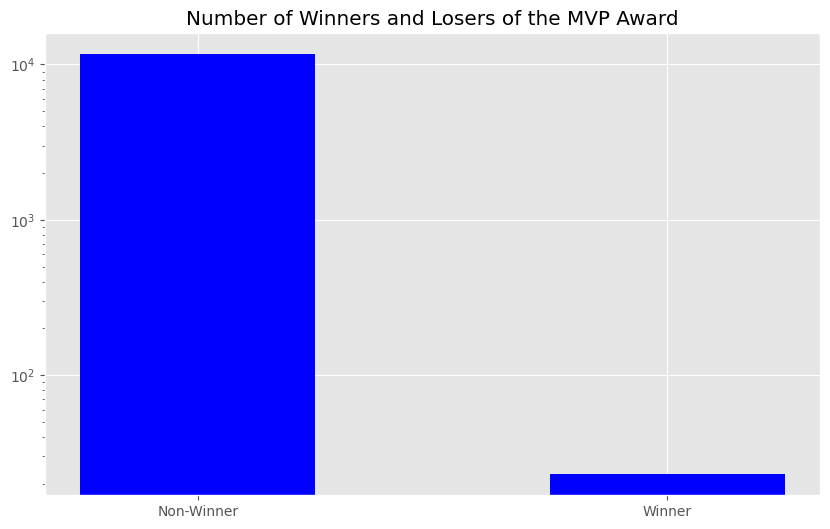

In [36]:
# create bar graph to visualize the unbalance in data
num_winners = renamed_df['MVP'].sum()
num_losers = renamed_df.shape[0] - num_winners
plt.bar(['Non-Winner', 'Winner'], [num_losers, num_winners], width = 0.5, color = 'blue')
plt.yscale('log') 
plt.title('Number of Winners and Losers of the MVP Award')
plt.show

The heat maps are helpful in visualizing how our player data correlates to one another. Most of the correlations make sense such as total points being closeley correlated to total field goal attempts. One surprising correlations is that number of turnovers and total points are well correlated. The scatter plot matrices are also helpful but similiarly to the heat map they highlight results that would be expected such as most MVP winners are near the top of point earners. The bar graph is useful as it illustrates the imbalance present in our player data. In our data we have 23 winners and over 10,000 losers. This imbalance will make it challenging to develop accurate models. 

## MVP Award Model

Lets create an SVM model for predicting MVP award winners

In [ ]:
#Determine the average stats for each season
#Create new player data data frame that only includes columns which we would like to get the seasonal averages of
player_stat_game_df2 = renamed_df.drop(columns = ['Player', 'Position', 'Team', 'MVP', 'Defensive Player of the Year', 'Age'])
#Create new data frame that contains the seasonal averages of relevant statistics
average_stat_game_df = player_stat_game_df2.groupby('Year').mean()
#Merge original data with season average data
merged_data = pd.merge(renamed_df, average_stat_game_df, on='Year', suffixes=('', '_avg'))
#Divide each statisitic by the corresponding season average
for stat in average_stat_game_df.columns:
    merged_data[stat] = merged_data[stat] / merged_data[f'{stat}_avg']
    merged_data.drop(columns=[f'{stat}_avg'], inplace=True)

player_average_game_df = merged_data
player_average_game_df.head(10)

To develop an accurate SVM model for predicting MVP winners we will need to address the data imbalance. To do this we have weighted the winning and losing data points. Weights are important as it ensures that the model properly accounts for the significance of the winning data points. To ensure that the optimal model was created a grid search was performed on the C parameter and the winning weigt parameter. 

In [29]:
#Create new data frame with predictor data
player_average_game_df2 = player_average_game_df.drop(columns = ['Player', 'Position', 'Team', 'MVP', 'Defensive Player of the Year'])

#Create data filters for splitting up testing and training data
train_years = ['0001', '0102', '0304', '0405', '0506', '0607', '0809', '0910', '1011', '1112', '1213', '1314',
              '1415', '1617', '1718', '1819', '1920', '2021', '2223']
test_years = ['0203', '0708', '1516', '2122']
#Filter both x_train and y_train based on train_years
x_train_first = player_average_game_df2[player_average_game_df2['Year'].isin(train_years)].to_numpy()
y_train_first = player_average_game_df[player_average_game_df['Year'].isin(train_years)]['MVP'].to_numpy()
#Filter both x_test and y_test based on train_years
x_test_first = player_average_game_df2[player_average_game_df2['Year'].isin(test_years)].to_numpy()
y_test_first = player_average_game_df[player_average_game_df['Year'].isin(test_years)]['MVP'].to_numpy()

#Define parameter grid for grid search (optimal params: C=80, weight=90)
#param_grid = {'C': range(10, 100, 10),
#              'gamma': ['scale'],
#              'class_weight': [{0:1, 1:weight} for weight in range(10, 100, 10)]}

#Initialize and fit grid search
#svm_model = svm.SVC(kernel = 'rbf', probability = True)
#grid_search = GridSearchCV(svm_model, param_grid, cv = 3, scoring = 'f1')
#grid_search.fit(x_train_first, y_train_first)

#Get best parameters and model
#best_params = grid_search.best_params_
#svm_model_first = grid_search.best_estimator_

#Initialize the model now that optimal parameters are known
svm_model_first = svm.SVC(kernel = 'rbf', C = 80, class_weight = {0:1, 1:90}, probability = True)
svm_model_first.fit(x_train_first, y_train_first)

#Evaluate the model
y_prediction = svm_model_first.predict(x_test_first)
confusion_matrix = metrics.confusion_matrix(y_test_first, y_prediction)
precision = metrics.precision_score(y_test_first, y_prediction)
recall = metrics.recall_score(y_test_first, y_prediction)
f1_first = metrics.f1_score(y_test_first, y_prediction)

#print("Best Parameters:", best_params)
print("Confusion Matrix:", confusion_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_first)

Confusion Matrix: [[1905   50]
 [   0    4]]
Precision: 0.07407407407407407
Recall: 1.0
F1-score: 0.13793103448275862


The model currently predicts 54 winners of the MVP award when in our testing set there are only 4. Lets narrow down the results of the model by adjusting the threshold. The threshold determines which players are considerd winners, the default value is zero. We will increase the threshold to decrease the number of predicted winners. 

In [30]:
#Refine the initial prediction by adjusting the threshold
f1_adjusted_old = 0
#Loop through threshold values to determine the best one
for new_threshold in np.arange(0.001, 0.05, 0.001):
    #Obtain predicted probabilities
    y_prob = svm_model_first.predict_proba(x_test_first)[:, 1]
    #Classify instances based on adjusted threshold
    y_prediction_adjusted = (y_prob > new_threshold).astype(int)
    #Determine the f1 score
    f1_adjusted = metrics.f1_score(y_test_first, y_prediction_adjusted)
    if f1_adjusted > f1_adjusted_old:
        best_threshold = new_threshold
        f1_adjusted_old = f1_adjusted
        y_prediction_best = y_prediction_adjusted

#Evaluate the adjusted predictions
confusion_matrix_adjusted = metrics.confusion_matrix(y_test_first, y_prediction_best)
precision_adjusted = metrics.precision_score(y_test_first, y_prediction_best)
recall_adjusted = metrics.recall_score(y_test_first, y_prediction_best)
f1_adjusted = metrics.f1_score(y_test_first, y_prediction_best)

print("Adjusted Confusion Matrix:", confusion_matrix_adjusted)
print("Adjusted Precision:", precision_adjusted)
print("Adjusted Recall:", recall_adjusted)
print("Adjusted F1-score:", f1_adjusted)
print("Best Threshold Value:", best_threshold)

#Create new data frame to contain predicted winners from the first model so that they can be input to the next model
#Create placeholder data frame that will be used later
df = player_average_game_df2[player_average_game_df2['Year'].isin(test_years)]

#Create a DataFrame to store the predictions and corresponding players
predictions_df = player_average_game_df.loc[df.index].copy()
predictions_df['First Prediction'] = y_prediction_best

#Filter the DataFrame to get the rows where the model predicted MVPs
predicted_mvp_first = predictions_df[predictions_df['First Prediction'] == 1]

#Print or display the predicted MVP players
display(predicted_mvp_first)

Adjusted Confusion Matrix: [[1935   20]
 [   1    3]]
Adjusted Precision: 0.13043478260869565
Adjusted Recall: 0.75
Adjusted F1-score: 0.22222222222222218
Best Threshold Value: 0.048


,Player,Age,Position,Team,Games,Games started,Minutes played per game,Field goals per game,Field goals attempt per game,Field goal percentage,3 point field goal per game,3 point field goal attempt per game,3 point field goal percentage,2 point field goal per game,2 point field goal attempt per game,2 point field goal percentage,Free throws per game,Free throw attempt per game,Free throw percentage,Effective field goal percentage,Offensive rebounds per game,Defensive rebounds per game,Total rebounds per game,Assists per game,Steals per game,Blocks per game,Turn overs per game,Personal fouls per game,Points per game,Year,MVP,Defensive Player of the Year,First Prediction
890,Allen Iverson,27,SG,PHI,1.466060,2.951724,2.066623,3.316780,3.499362,0.993881,2.416714,3.076146,1.309114,3.467182,3.589701,1.016243,4.586650,4.436766,1.101992,0.985670,0.763263,1.333578,1.168715,3.084786,4.015288,0.461207,2.871382,0.933366,3.516342,0203,0.0,0.0,1
1120,Kobe Bryant,24,SG,LAL,1.466060,2.951724,2.017996,3.587538,3.469831,1.082706,3.625071,3.325563,1.810075,3.585382,3.499958,1.073984,4.783221,4.288874,1.200232,1.091923,1.240303,2.196481,1.920031,3.309134,3.271716,1.844828,2.871382,1.400048,3.822111,0203,0.0,0.0,1
1189,Paul Pierce,25,SG,BOS,1.412423,2.843734,1.906156,2.842954,2.982578,0.998682,3.625071,4.073815,1.427265,2.718586,2.728172,1.048578,4.979792,4.683253,1.141857,1.026363,1.240303,2.353372,2.031337,2.467829,2.676859,1.844828,2.953422,1.503756,3.299756,0203,0.0,0.0,1
1244,Shaquille O'Neal,30,C,LAL,1.197878,2.375778,1.838079,3.519848,2.672508,1.377989,0.000000,0.000000,0.000000,4.097579,3.248679,1.325735,4.390080,5.324119,0.885580,1.297648,3.720909,2.824047,3.088746,1.738697,0.892286,5.534483,2.379145,1.763024,3.503602,0203,0.0,0.0,1
1268,Tim Duncan,26,PF,SAS,1.448181,2.915728,1.911018,2.978333,2.539621,1.231548,0.241671,0.249417,1.290210,3.427782,3.033297,1.194086,3.669320,3.845197,1.010871,1.164266,3.053054,3.804619,3.589624,2.187394,1.041001,6.687500,2.543224,1.503756,2.968506,0203,1.0,0.0,1
1279,Tracy McGrady,23,SG,ORL,1.340908,2.663751,1.915881,3.756761,3.573188,1.097110,5.558442,4.988345,1.824253,3.427782,3.266628,1.110938,5.045315,4.781848,1.129043,1.141659,1.526527,1.921921,1.808725,3.084786,2.528145,1.844828,2.133027,1.088927,4.089659,0203,0.0,0.0,1
3143,Allen Iverson,32,SG,DEN,1.483417,3.000000,2.025630,2.815332,2.774353,1.037132,2.224969,2.240773,1.529798,2.942972,2.927317,1.041957,5.052587,4.622961,1.149830,1.022675,0.617566,0.918524,0.837157,3.896341,3.228121,0.241158,2.583238,0.697009,3.187123,0708,0.0,0.0,1
3271,Dwyane Wade,26,SG,MIA,0.922613,1.792683,1.856020,2.782971,2.686742,1.062042,0.741656,0.988576,1.268180,3.217649,3.171261,1.048442,4.413019,4.384664,1.077344,1.005910,0.926349,1.262970,1.172020,3.786585,2.743902,1.688103,3.788749,1.447635,2.969819,0708,0.0,0.0,1
3381,Kobe Bryant,29,SG,LAL,1.483417,3.000000,1.885096,3.074213,3.007982,1.039397,3.337454,3.361160,1.600745,2.982211,2.908553,1.059251,4.860716,4.289345,1.193890,1.054110,1.132205,1.990134,1.758031,2.963415,2.905308,1.205788,2.669346,1.501251,3.416499,0708,1.0,0.0,1
3393,LeBron James,23,SF,CLE,1.356784,2.707317,1.957786,3.430174,3.197806,1.096009,2.781211,3.163445,1.396772,3.570806,3.208790,1.147882,4.668846,4.908918,1.011964,1.085544,1.852699,2.334581,2.204514,3.951220,2.905308,2.652733,2.927669,1.179554,3.621730,0708,0.0,0.0,1


We now have a complete set of predicted winners from our model. Lets do some math to determine how well our model is perfoming. 

In [37]:
#Determine how well the two models are able to predict the winner of the MVP award
#Number of times the model correctly predicted a winner of the MVP award
pred_true_winners = predicted_mvp_first['MVP'].sum()
#Number of players predicted to have won the MVP award
pred_winners = predicted_mvp_first['First Prediction'].sum()
#Percentage that a predicted winner has in fact won the MVP award
percent_picked_true_winners = (pred_true_winners/pred_winners)*100
print('Percentage of predicted winners that are true winners: ')
print(percent_picked_true_winners)

#Average number of predicted MVP winners for each season
ave_pred_year = (predicted_mvp_first.groupby('Year')['First Prediction'].sum().sum())/len(test_years)
print('Average number of predicted winners for each season: ')
print(ave_pred_year)

#Percentage that a actual MVP winner is among the predicted winners
percent_mvp_present = (pred_true_winners/len(test_years))*100
print('Percentage that true MVP winner is among selected winners')
print(percent_mvp_present)

Percentage of predicted winners that are true winners: 
13.043478260869565
Average number of predicted winners for each season: 
5.75
Percentage that true MVP winner is among selected winners
75.0


Now that we have a good understanding of how the model works, lets see who it predicts will win the MVP award in 2024.

In [38]:
#Predict the winner of the 2024 MVP award
#Run the model and then narrow down results with our best threshold value
x_2024 = player_average_game_df2[player_average_game_df2['Year'].isin(['2324'])].to_numpy()
y_prob = svm_model_first.predict_proba(x_2024)[:, 1]
y_prediction_adjusted = (y_prob > best_threshold).astype(int)
#Create a dataframe containing the predicted winners of the 2024 MVP award
predicted_winners_2024 = player_average_game_df[player_average_game_df['Year'].isin(['2324'])]
predicted_winners_2024.loc[:, 'First Prediction'] = y_prediction_adjusted
predicted_winners_2024 = predicted_winners_2024[predicted_winners_2024['First Prediction'] == 1]
display(predicted_winners_2024)

C:\Users\Jake\AppData\Local\Temp\ipykernel_4648\1585619788.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_winners_2024.loc[:, 'First Prediction'] = y_prediction_adjusted


,Player,Age,Position,Team,Games,Games started,Minutes played per game,Field goals per game,Field goals attempt per game,Field goal percentage,3 point field goal per game,3 point field goal attempt per game,3 point field goal percentage,2 point field goal per game,2 point field goal attempt per game,2 point field goal percentage,Free throws per game,Free throw attempt per game,Free throw percentage,Effective field goal percentage,Offensive rebounds per game,Defensive rebounds per game,Total rebounds per game,Assists per game,Steals per game,Blocks per game,Turn overs per game,Personal fouls per game,Points per game,Year,MVP,Defensive Player of the Year,First Prediction
11267,Giannis Antetokounmpo,29,PF,MIL,1.581667,3.394797,1.887329,3.685567,2.812943,1.359034,0.531401,0.642399,0.914917,5.051786,4.236486,1.241161,5.625966,6.681659,0.936705,1.208136,3.147982,3.488047,3.409350,3.247729,2.029568,2.730903,3.453125,1.945122,3.609058,2324,0.0,0.0,1
11367,Joel Embiid,29,C,PHI,0.845000,1.813659,1.801541,3.685567,3.261817,1.176644,1.487923,1.360375,1.295576,4.684384,4.533784,1.069900,8.197836,7.243668,1.258920,1.086161,2.798206,3.408773,3.261117,2.798043,2.029568,4.220486,3.859375,1.945122,4.119549,2324,0.0,0.0,1
11456,Luka Dončić,24,PG,DAL,1.516667,3.255285,2.010648,3.685567,3.531141,1.083224,4.357488,4.005549,1.275541,3.398475,3.220721,1.102613,5.465224,5.432751,1.120624,1.109394,0.932735,3.329499,2.727480,4.896576,2.367830,1.241319,4.062500,1.408537,4.024574,2324,0.0,0.0,1
11584,Shai Gilgeous-Alexander,25,PG,OKC,1.625000,3.487805,1.822988,3.397131,2.962568,1.189989,1.381643,1.360375,1.178707,4.271056,4.013514,1.108385,6.108192,5.432751,1.246088,1.097777,1.049327,1.862934,1.630559,3.097834,3.382614,2.234375,2.234375,1.676829,3.573442,2324,0.0,0.0,1


## Defensive Player of the Year Model

In [32]:
# determine the average stats for each season
# create new player data data frame that only includes columns which we would like to get the seasonal averages of
player_stat_game_df2 = renamed_df.drop(columns = ['Player', 'Position', 'Team', 'MVP', 'Defensive Player of the Year', 'Age'])
# create new data frame that contains the seasonal averages of relevant statistics
average_stat_game_df = player_stat_game_df2.groupby('Year').mean()
# merge original data with season average data
merged_data = pd.merge(renamed_df, average_stat_game_df, on='Year', suffixes=('', '_avg'))
# divide each statisitic by the corresponding season average
for stat in average_stat_game_df.columns:
    merged_data[stat] = merged_data[stat] / merged_data[f'{stat}_avg']
    merged_data.drop(columns=[f'{stat}_avg'], inplace=True)

player_average_game_df = merged_data
player_average_game_df.head(10)

,Player,Age,Position,Team,Games,Games started,Minutes played per game,Field goals per game,Field goals attempt per game,Field goal percent,3 point field goal per game,3 point field goal attempt per game,3 point field goal percentage,2 point field goal per game,2 point field goal attempt per game,2 point field goal percentage,Free throws per game,Free throw attempt per game,Free throw percentage,Effective field goal percentage,Offensive rebounds per game,Defensive rebounds per game,Total rebounds per game,Assist per game,Steals per game,Blocks per game,Turn overs per game,Personal fouls per game,Points per game,Year,MVP,Defensive Player of the Year
0,A.C. Green,37,PF,MIA,1.508510,0.037090,1.081198,0.748294,0.745492,1.050394,0.000000,0.081173,0.000000,0.865873,0.881628,1.040479,0.788124,0.827756,1.037054,0.989554,1.654581,1.253584,1.366826,0.332117,0.711290,0.282127,0.579551,0.987505,0.717856,0001,0,0
1,A.J. Guyton,22,PG,CHI,0.607083,0.296720,0.482746,0.405326,0.441773,0.960496,1.033235,0.933491,1.768704,0.306663,0.341007,0.953198,0.149644,0.134231,1.213295,1.063102,0.154634,0.158219,0.157207,0.545012,0.213387,0.176329,0.309094,0.290443,0.387290,0001,0,0
2,Aaron McKie,28,SG,PHI,1.398131,1.223970,1.834435,1.756413,1.642844,1.119001,2.028202,2.299905,1.411345,1.713707,1.508195,1.203556,1.486461,1.446708,1.118620,1.138878,0.510291,1.691730,1.358092,3.210462,2.513226,0.282127,2.614421,1.477109,1.717377,0001,0,0
3,Aaron Williams,29,PF,NJN,1.508510,0.927250,1.789992,1.543357,1.495586,1.081149,0.000000,0.027058,0.000000,1.785863,1.796526,1.051963,2.434204,2.311751,1.146294,1.018527,3.262772,2.306352,2.576445,0.749392,1.398871,3.985046,1.700018,2.647178,1.639136,0001,0,0
4,Adam Keefe,30,PF,GSW,1.232563,0.482170,0.640596,0.332575,0.365843,0.953398,0.038268,0.040587,1.506339,0.378819,0.432497,0.927933,0.389074,0.469807,0.901596,0.904862,1.391704,0.724158,0.912673,0.306569,0.663871,0.705318,0.515157,0.846433,0.328610,0001,0,0
5,Adonal Foyle,25,C,GSW,1.066995,1.372330,1.116446,0.810652,0.862838,0.984153,0.000000,0.000000,0.000000,0.938029,1.039656,0.955495,0.299287,0.507094,0.642333,0.927150,2.412287,1.515255,1.768576,0.408759,0.735000,5.501479,1.017435,1.128578,0.668955,0001,0,0
6,Adrian Griffin,26,SF,BOS,0.809444,0.000000,0.288881,0.171484,0.223187,0.804356,0.344412,0.351750,1.565145,0.144312,0.196842,0.776340,0.179572,0.178974,1.092403,0.862516,0.417511,0.365122,0.379916,0.229927,0.426774,0.176329,0.231821,0.373426,0.181909,0001,0,0
7,Al Harrington,20,PF,IND,1.434924,1.409420,1.449771,1.252354,1.249390,1.050394,0.038268,0.094702,0.646866,1.443122,1.486015,1.028995,1.027553,1.170790,0.955488,0.991783,1.840142,1.594364,1.663772,1.107056,1.493710,0.634786,1.906080,1.850535,1.146222,0001,0,0
8,Alan Henderson,28,PF,ATL,1.342942,1.557780,1.386937,1.548554,1.543905,1.050394,0.000000,0.013529,0.000000,1.791876,1.857519,1.022104,1.725891,2.020918,0.929270,0.989554,2.783408,1.375292,1.772943,0.425791,1.209194,1.022711,1.622744,1.360932,1.504171,0001,0,0
9,Allan Houston,29,SG,NYK,1.434924,2.893019,2.189981,2.816497,2.779489,1.062223,3.673724,3.409271,1.723469,2.681801,2.650430,1.072635,2.783373,2.289379,1.323992,1.087618,0.309268,1.600450,1.235820,1.473236,1.232903,0.352659,2.073506,1.576689,2.853818,0001,0,0


In [33]:
# create new data frame with predictor data
player_average_game_df2 = player_average_game_df.drop(columns = ['Player', 'Position', 'Team', 'MVP', 'Defensive Player of the Year'])
# create data filters for splitting up testing and training data
train_years = ['0001', '0102', '0203', '0304', '0405', '0506', '0607', '0708', '0809', '0910', '1011', '1112', '1213', '1314',
              '1415', '1516', '1617', '1718', '1819', '1920', '2021']
test_year = ['2122']
# Filter both x_train and y_train based on train_years
x_train = player_average_game_df2[player_average_game_df2['Year'].isin(train_years)].to_numpy()
y_train = player_average_game_df[player_average_game_df['Year'].isin(train_years)]['Defensive Player of the Year'].to_numpy()
# Filter both x_test and y_test based on train_years
x_test_first = player_average_game_df2[player_average_game_df2['Year'].isin(test_year)].to_numpy()
y_test_first = player_average_game_df[player_average_game_df['Year'].isin(test_year)]['Defensive Player of the Year'].to_numpy()

# initialize old confusion matrix and model accuracy
confusion_matrix_old = [[0, 100],[0, 0]]
model_accuracy = []

# for loop used to determine the optimal class weights
for i in range(500, 1000, 100):
    for j in range(10, 100, 10):
        # Define class weights
        class_weights = {0: 1, 1: i}
        # create svm model
        svm_model = svm.SVC(kernel = 'rbf', C = j, gamma = 'scale', class_weight = class_weights)
        # train the nearest neighbor model with the training data 
        svm_model.fit(x_train, y_train)
        # get model predictions
        y_prediction = svm_model.predict(x_test_first)
        # determine the confusion matrix with the confusion_matrix function
        confusion_matrix = metrics.confusion_matrix(y_test_first, y_prediction)
        # determine ideal parameters
        if confusion_matrix[1][1] == 1 and confusion_matrix[0][1] < confusion_matrix_old[0][1]:
            best_weight = i
            best_c = j
            confusion_matrix_old = confusion_matrix

In [34]:
# display results from previous cell
print('Best Weight: ')
print(best_weight)
print('Best C Value: ')
print(best_c)

# develop svm model using the ideal parameters
ideal_class_weights = {0:1, 1:best_weight}

# develop the ideal svm model
svm_model_first = svm.SVC(kernel = 'rbf', C = best_c, gamma = 'scale', class_weight = ideal_class_weights)
# train the nearest neighbor model with the training data 
svm_model_first.fit(x_train, y_train)
# get model predictions
y_prediction = svm_model_first.predict(x_test_first)
# assess accuracy using the accuracy_score function
model_accuracy = metrics.accuracy_score(y_test_first, y_prediction)
# determine the confusion matrix with the confusion_matrix function
confusion_matrix = metrics.confusion_matrix(y_test_first, y_prediction)
print('Model Accuracy: ')
print(model_accuracy)
print('Confusion Matrix: ')
print(confusion_matrix)

# create placeholder data frame that will be used later
x_test1 = player_average_game_df2[player_average_game_df2['Year'].isin(test_year)]

# Create a DataFrame to store the predictions and corresponding players
predictions_df = player_average_game_df.loc[x_test1.index].copy()
predictions_df['First Prediction'] = y_prediction

# Filter the DataFrame to get the rows where the model predicted MVPs
predicted_mvp_df = predictions_df[predictions_df['First Prediction'] == 1]

# Print or display the predicted MVP players
display(predicted_mvp_df)

Best Weight: 
500
Best C Value: 
90
Model Accuracy: 
0.9884297520661157
Confusion Matrix: 
[[598   6]
 [  1   0]]


,Player,Age,Position,Team,Games,Games started,Minutes played per game,Field goals per game,Field goals attempt per game,Field goal percent,3 point field goal per game,3 point field goal attempt per game,3 point field goal percentage,2 point field goal per game,2 point field goal attempt per game,2 point field goal percentage,Free throws per game,Free throw attempt per game,Free throw percentage,Effective field goal percentage,Offensive rebounds per game,Defensive rebounds per game,Total rebounds per game,Assist per game,Steals per game,Blocks per game,Turn overs per game,Personal fouls per game,Points per game,Year,MVP,Defensive Player of the Year,First Prediction
10145,Giannis Antetokounmpo,27,PF,MIL,1.556703,3.295528,2.245768,4.171370,3.475535,1.280308,1.403850,1.691917,1.037001,5.392748,4.661103,1.238699,8.031423,8.616984,1.070078,1.177196,3.188970,4.642478,4.304553,3.871298,2.320477,4.748577,4.125385,2.655157,4.451096,2122,0,0,1
10202,Jaren Jackson Jr.,22,PF,MEM,1.812282,3.836585,2.166289,2.603322,2.892092,0.960810,2.530884,2.803548,1.129022,2.635291,2.950947,0.957177,4.124637,3.881017,1.219770,0.964816,2.831996,2.414954,2.511912,0.858071,2.352706,9.236243,2.448859,3.406616,2.828069,2122,0,0,1
10234,Joel Embiid,27,C,PHI,1.579938,3.344715,2.340530,4.032122,3.723987,1.155287,1.838846,1.754839,1.313063,5.000072,5.032876,1.063753,9.498284,9.033209,1.206431,1.080108,3.474550,4.685731,4.404145,2.833630,2.481622,5.166034,4.031198,2.266903,4.622292,2122,0,0,1
10271,Karl-Anthony Towns,26,C,MIN,1.719344,3.639837,2.522922,3.886821,3.388996,1.224743,2.965880,2.558849,1.451094,4.293256,3.940793,1.166308,5.576974,5.253435,1.218288,1.195400,4.616867,3.842300,4.022378,2.683967,2.320477,4.331120,4.257247,3.343995,4.042004,2122,0,0,1
10388,Nikola Jokić,26,C,DEN,1.719344,3.639837,2.522922,4.625438,3.659781,1.349764,1.917936,2.013521,1.192728,5.820328,4.754046,1.311091,5.504357,5.264685,1.200503,1.254058,4.902447,5.860769,5.637969,5.826902,3.512945,3.287476,5.293303,2.392146,4.455543,2122,1,0,1
10438,Rudy Gobert,29,C,UTA,1.533469,3.246341,2.160176,2.191634,1.418130,1.650741,0.000000,0.027966,0.000000,3.158859,2.342169,1.443808,4.400581,4.938454,1.022650,1.442167,5.735387,5.240810,5.355794,0.718385,1.450298,7.148956,2.241648,2.204281,2.283354,2122,0,0,1


In [51]:
# this cell develops a second svm model which is used to predict the MVPs from the pool of previously predicted MVPs
# create new test and train data from the results of previous run do this in an effort to decrease number of predicted MVPs
x_test_second = predicted_mvp_df.drop(columns = ['First Prediction', 'Player', 'Position', 'Team', 'MVP', 'Defensive Player of the Year']).to_numpy()
y_test_second = predicted_mvp_df['Defensive Player of the Year'].to_numpy()

param_grid = {
    'C': list(range(10, 100, 10)),
    'class_weight': [{0: 1, 1: i} for i in range(500, 1000, 100)],
    'gamma': ['scale']
}

# Create the SVM model
svm_model = svm.SVC(kernel='rbf')

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Print the best estimator
print("Best Estimator:", best_estimator)

Best Parameters: {'C': 90, 'class_weight': {0: 1, 1: 500}, 'gamma': 'scale'}
Best Estimator: SVC(C=90, class_weight={0: 1, 1: 500})


In [52]:
# display results from previous cell
print('Best Weight: ')
print(best_params['class_weight'])
print('Best C Value: ')
print(best_params['C'])

# develop svm model using the ideal parameters
ideal_class_weights = {0:1, 1:best_params['class_weight']}

# develop the ideal svm model
svm_model_second = svm.SVC(kernel = 'rbf', C = best_params['C'], gamma = 'scale', class_weight = best_params['class_weight'])
# train the nearest neighbor model with the training data 
svm_model_second.fit(x_train, y_train)
# get model predictions
y_prediction = svm_model_second.predict(x_test_second)
# assess accuracy using the accuracy_score function
model_accuracy = metrics.accuracy_score(y_test_second, y_prediction)
# determine the confusion matrix with the confusion_matrix function
confusion_matrix = metrics.confusion_matrix(y_test_second, y_prediction)
print('Model Accuracy: ')
print(model_accuracy)
print('Confusion Matrix: ')
print(confusion_matrix)

# add final predicted winners to dataframe
predicted_mvp_df.loc[:, 'Second Prediction'] = y_prediction
display(predicted_mvp_df)

Best Weight: 
{0: 1, 1: 500}
Best C Value: 
90


ValueError: X has 28 features, but SVC is expecting 27 features as input.

In [ ]:
years = ['0001', '0102', '0203', '0304', '0405', '0506', '0607', '0708', '0809', '0910', '1011', '1112', '1213', '1314','1415',
         '1516', '1617', '1718', '1819', '1920', '2021', '2122']

complete_predicted_mvp_df = pd.DataFrame()
complete_predicted_mvp_df = complete_predicted_mvp_df.reindex(columns = predicted_mvp_df.columns)

for year in years:
    # test model to see how it predicts the winner of each year
    x_test_final_first = player_average_game_df2[player_average_game_df2['Year'].isin([year])].to_numpy()
    y_test_final_first = player_average_game_df[player_average_game_df['Year'].isin([year])]['Defensive Player of the Year'].to_numpy()
    
    # get the prediction from the first model
    y_prediction_first = svm_model_first.predict(x_test_final_first)
    
    # create placeholder data frame that will be used later
    x_test1 = player_average_game_df2[player_average_game_df2['Year'].isin([year])]
    
    # Create a DataFrame to store the predictions and corresponding players
    predictions_df = player_average_game_df.loc[x_test1.index].copy()
    predictions_df['First Prediction'] = y_prediction_first
    
    # Filter the DataFrame to get the rows where the model predicted MVPs
    predicted_mvp_df = predictions_df[predictions_df['First Prediction'] == 1]
    
    # create the second set of test data based on results from the first model
    x_test_final_second = predicted_mvp_df.drop(columns = ['First Prediction', 'Player', 'Position', 'Team', 'MVP', 'Defensive Player of the Year']).to_numpy()
    y_test_final_second = predicted_mvp_df['Defensive Player of the Year'].to_numpy()
    
    # get the prediction from the second model
    y_prediction_second = svm_model_second.predict(x_test_final_second)
    
    # add final predicted winners to dataframe
    predicted_mvp_df.loc[:, 'Second Prediction'] = y_prediction_second
    
    # fill out data frame with all the predicted winners
    complete_predicted_mvp_df = pd.concat([complete_predicted_mvp_df, predicted_mvp_df], ignore_index = True)
    
display(complete_predicted_mvp_df)

In [ ]:
# determine how well the two models are able to predict the winner of the MVP award
predicted_mvp_winners = complete_predicted_mvp_df[complete_predicted_mvp_df['Second Prediction'] == 1]
display(predicted_mvp_winners)
num_true_winners = len(years)
pred_true_winners = predicted_mvp_winners['Defensive Player of the Year'].sum()
percent_picked_true_winners = (pred_true_winners/num_true_winners)*100
print('Percentage that model predicts the true winner: ')
print(percent_picked_true_winners)

## Championship Prediction